In [5]:
import os 
import numpy as np
import argparse
import json
from PIL import Image
import torch
import random

from run_editing_pnp import edit_image_ddim_PnP,edit_image_directinversion_PnP

image_path="scripts/example_cake.jpg"
prompt_src="a round cake with orange frosting on a wooden plate"
prompt_tar="a square cake with orange frosting on a wooden plate"

In [6]:
def mask_decode(encoded_mask,image_shape=[512,512]):
    length=image_shape[0]*image_shape[1]
    mask_array=np.zeros((length,))
    
    for i in range(0,len(encoded_mask),2):
        splice_len=min(encoded_mask[i+1],length-encoded_mask[i])
        for j in range(splice_len):
            mask_array[encoded_mask[i]+j]=1
            
    mask_array=mask_array.reshape(image_shape[0], image_shape[1])
    # to avoid annotation errors in boundary
    mask_array[0,:]=1
    mask_array[-1,:]=1
    mask_array[:,0]=1
    mask_array[:,-1]=1
            
    return mask_array


def setup_seed(seed=1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

ddim pnp


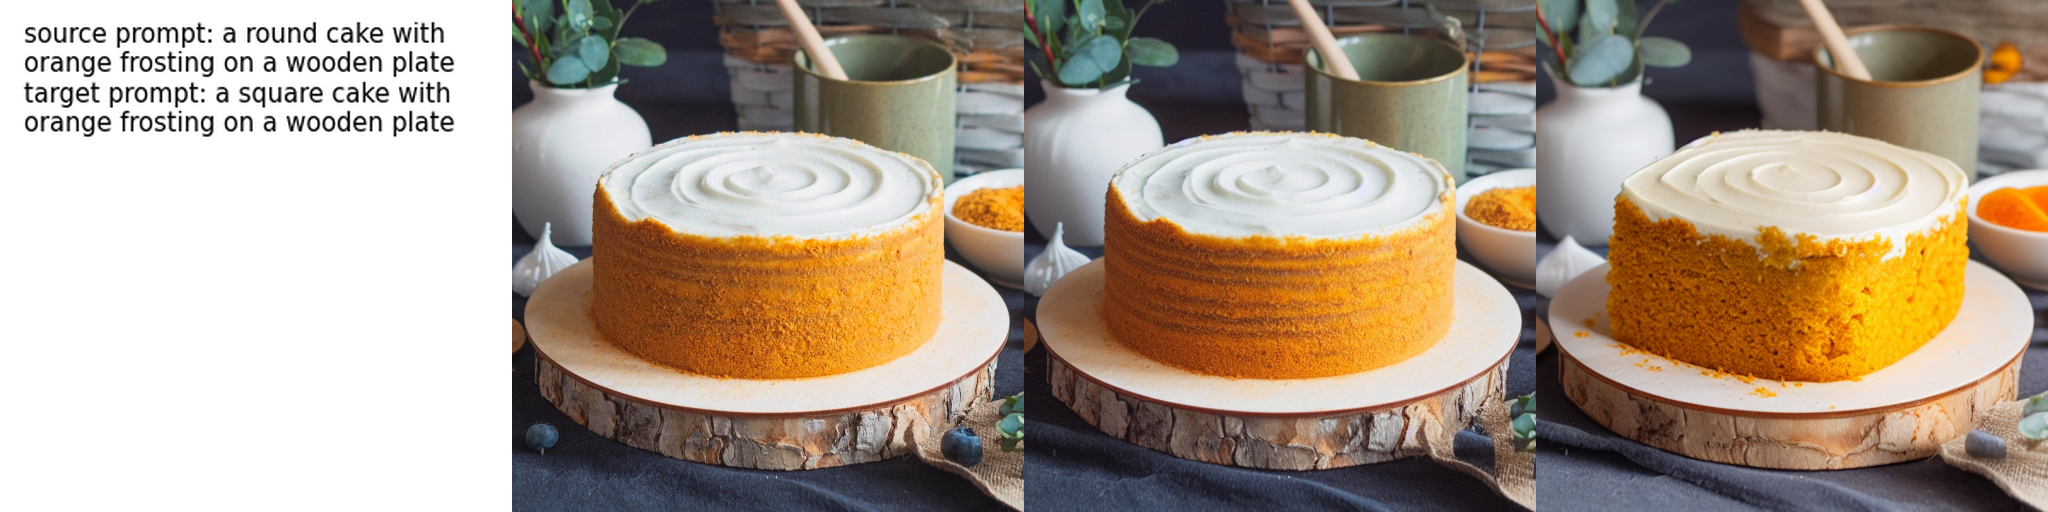

In [7]:
edited_image=edit_image_ddim_PnP(image_path=image_path,
                                 prompt_src=prompt_src,
                                 prompt_tar=prompt_tar,
                                 guidance_scale=7.5)

print("ddim pnp")
display(edited_image)

directinversion pnp


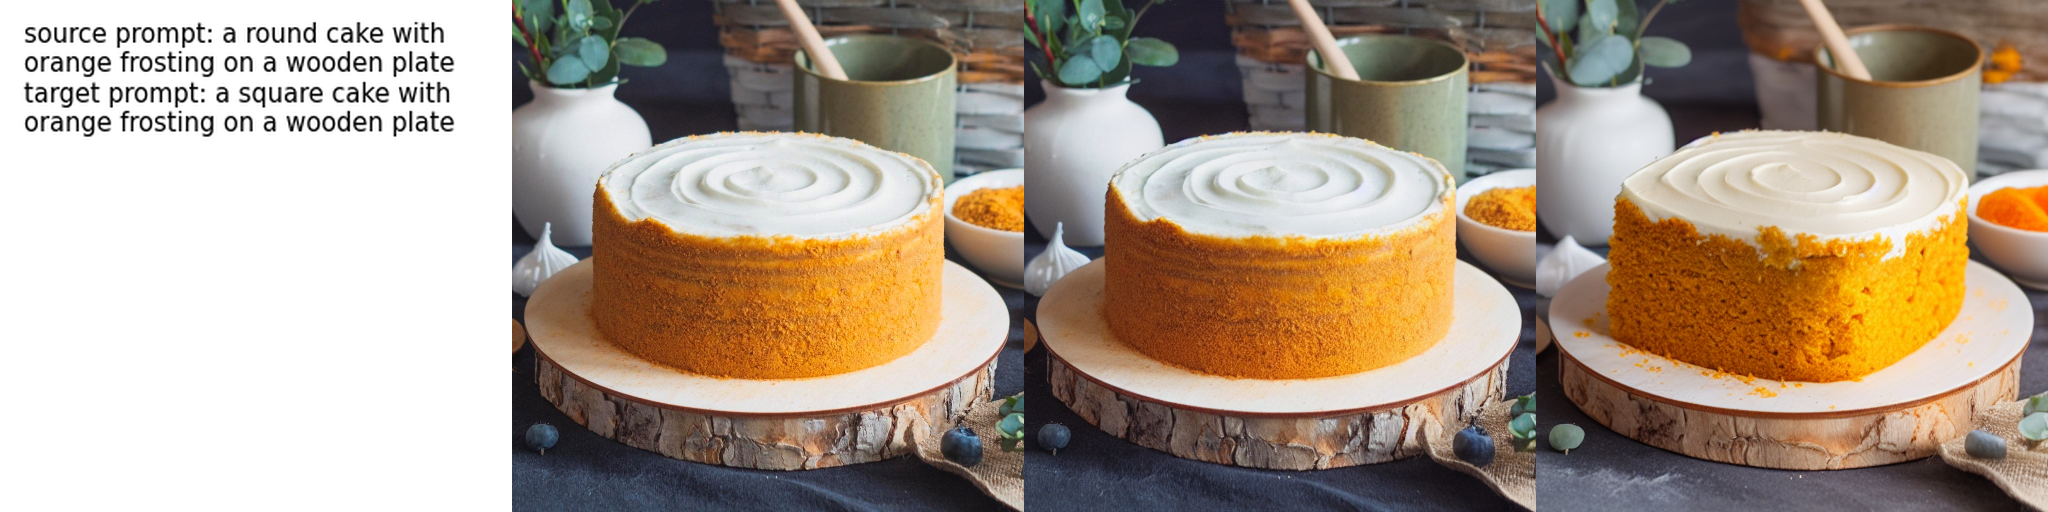

In [8]:

edited_image=edit_image_directinversion_PnP(image_path=image_path,
                                 prompt_src=prompt_src,
                                 prompt_tar=prompt_tar,
                                 guidance_scale=7.5)

print("directinversion pnp")
display(edited_image)